In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp(), 比np.快
import time

In [27]:
def hamiltonian(kx, ky):
    p = np.zeros((4,4))*(1+1j)
    p[0,1] = w + v*cmath.exp(-kx*1j)
    p[2,3] = w + v*cmath.exp(-kx*1j)
    p[0,2] = w + v*cmath.exp(-ky*1j)
    p[1,3] = w + v*cmath.exp(-ky*1j)
    p[1,0] = w + v*cmath.exp(kx*1j)
    p[3,2] = w + v*cmath.exp(kx*1j)
    p[2,0] = w + v*cmath.exp(ky*1j)
    p[3,1] = w + v*cmath.exp(ky*1j)
    return p


def plot_bands_two_dimension(hamiltonian):
    dim = hamiltonian(0,0).shape[0]
    kxky = np.arange(0,2+np.sqrt(2),0.02)
    dim_k = kxky.shape[0]
    eigenvalue_k = np.zeros((dim_k,dim))
    for i in range(dim_k):
        xy = kxky[i]
        k1 = (xy<=1) + (xy>1)*(xy<2)*(xy-2) + (xy>=2)*(xy-2)/np.sqrt(2)
        kx = k1*np.pi
        k2 = (xy<=1)*(1-xy) + (xy>=2)*(xy-2)/np.sqrt(2)
        ky = k2*np.pi
        matrix0 = hamiltonian(kx,ky)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i, :] = np.sort(np.real(eigenvalue[:]))
    for dim0 in range(dim):
        plt.plot(kxky, eigenvalue_k[:, dim0], '-k')
    plt.show()
    
    

def find_vector_without_excess_phase(vector_0):
    angle = cmath.phase(vector_0[0])
    vector_1 = vector_0*cmath.exp(-1j*angle)
    return vector_1


def chern_number_and_z():
    n = 100  # 积分密度
    delta = 1e-9  # 求导的偏离量
    chern_number = 0  # 陈数初始化
    z = 0
    #AA = []
    for kx in np.arange(-pi, pi, 2*pi/n):
        for ky in np.arange(-pi, pi, 2*pi/n):
            H = hamiltonian(kx, ky)
            eigenvalue, eigenvector = np.linalg.eig(H)
            vector = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 价带波函数
            vector = find_vector_without_excess_phase(vector)
            # print(np.argsort(np.real(eigenvalue))[0])  # 排序索引（从小到大）
            # print(eigenvalue)  # 排序前的本征值
            # print(np.sort(np.real(eigenvalue)))  # 排序后的本征值（从小到大）
           
            H_delta_kx = hamiltonian(kx+delta, ky) 
            eigenvalue, eigenvector = np.linalg.eig(H_delta_kx)
            vector_delta_kx = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]   # 略偏离kx的波函数
            vector_delta_kx = find_vector_without_excess_phase(vector_delta_kx)

            H_delta_ky = hamiltonian(kx, ky+delta)  
            eigenvalue, eigenvector = np.linalg.eig(H_delta_ky)
            vector_delta_ky = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 略偏离ky的波函数
            vector_delta_ky = find_vector_without_excess_phase(vector_delta_ky)

            H_delta_kx_ky = hamiltonian(kx+delta, ky+delta)  
            eigenvalue, eigenvector = np.linalg.eig(H_delta_kx_ky)
            vector_delta_kx_ky = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 略偏离kx和ky的波函数
            vector_delta_kx_ky = find_vector_without_excess_phase(vector_delta_kx_ky)

            # 价带的波函数的贝里联络(berry connection) # 求导后内积
            A_x = np.dot(vector.transpose().conj(), (vector_delta_kx-vector)/delta)   # 贝里联络Ax（x分量）
            A_y = np.dot(vector.transpose().conj(), (vector_delta_ky-vector)/delta)   # 贝里联络Ay（y分量）
            
            A_x_delta_ky = np.dot(vector_delta_ky.transpose().conj(), (vector_delta_kx_ky-vector_delta_ky)/delta)  # 略偏离ky的贝里联络Ax
            A_y_delta_kx = np.dot(vector_delta_kx.transpose().conj(), (vector_delta_kx_ky-vector_delta_kx)/delta)  # 略偏离kx的贝里联络Ay

            # 贝里曲率(berry curvature)
            F = (A_y_delta_kx-A_y)/delta-(A_x_delta_ky-A_x)/delta

            # 陈数(chern number)
            chern_number = chern_number + F*(2*pi/n)**2
            z = z + A_x/n/n/1j
            #AA.append(A_x.imag)
    #plt.imshow(np.array(AA).reshape((100,100)))
    #np.savetxt('aaa.txt',AA)
    chern_number = chern_number/(2*pi*1j)
    
    return chern_number, z



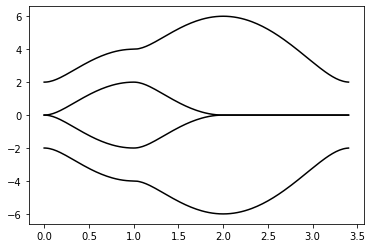

  w = 1, v = 2
  Chern number = -0.0000-0.0000j 
  z = 1.0000-0.0000j pi 
  Polarization = 0.50000003-0.00000000j
  运行时间(min)= 0.05510308345158895


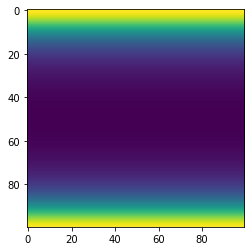

In [28]:
def main():
    start_time = time.time()
    plot_bands_two_dimension(hamiltonian)
    print('  w = {}, v = {}'.format(w,v))
    c, z = chern_number_and_z()                  
    print('  Chern number = {:.4f} \n  z = {:.4f} pi \n  Polarization = {:.8f}'.format(c,z*2,z))
    end_time = time.time()
    print('  运行时间(min)=', (end_time-start_time)/60)


if __name__ == '__main__':
    w = 1
    v = 2
    main()

In [4]:
#尝试另一种算法

def Polarization():
    start_time = time.time()
    n = 101  # 积分密度
    z = 1
    k_array = np.linspace(-pi,pi,n)
    vector_array = np.zeros((n,n,4),dtype=complex)
    for j in np.arange(n):
        for i in np.arange(n):
            kx = k_array[i]
            ky = k_array[j]
            H = hamiltonian(kx, ky)
            eigenvalue, eigenvector = np.linalg.eig(H)
            vector = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 价带波函数
            vector = find_vector_without_excess_phase(vector)
            vector_array[i][j] = vector
    
    for j in np.arange(n):
        for i in np.arange(n-1):
            A_x = np.dot(vector_array[i+1][j].transpose().conj(), vector_array[i][j])  # 贝里联络Ax（x分量）        
            z = np.dot(A_x,z)
            
    z = np.log(z)/2/pi/1j
            
    return z

#print('Polarization = {:.8f}'.format(Polarization()))

In [5]:
# 陈数计算，高效法

def main():
    start_time = time.time()
    n = 100 
    delta = 2*pi/n
    chern_number = 0  # 陈数初始化
    for kx in np.arange(-pi, pi, 2*pi/n):
        for ky in np.arange(-pi, pi, 2*pi/n):
            H = hamiltonian(kx, ky)
            eigenvalue, eigenvector = np.linalg.eig(H)
            vector = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 价带波函数
           
            H_delta_kx = hamiltonian(kx+delta, ky) 
            eigenvalue, eigenvector = np.linalg.eig(H_delta_kx)
            vector_delta_kx = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]   # 略偏离kx的波函数

            H_delta_ky = hamiltonian(kx, ky+delta)  
            eigenvalue, eigenvector = np.linalg.eig(H_delta_ky)
            vector_delta_ky = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 略偏离ky的波函数
            
            H_delta_kx_ky = hamiltonian(kx+delta, ky+delta)  
            eigenvalue, eigenvector = np.linalg.eig(H_delta_kx_ky)
            vector_delta_kx_ky = eigenvector[:, np.argsort(np.real(eigenvalue))[0]]  # 略偏离kx和ky的波函数
            
            Ux = np.dot(np.conj(vector), vector_delta_kx)/abs(np.dot(np.conj(vector), vector_delta_kx))
            Uy = np.dot(np.conj(vector), vector_delta_ky)/abs(np.dot(np.conj(vector), vector_delta_ky))
            Ux_y = np.dot(np.conj(vector_delta_ky), vector_delta_kx_ky)/abs(np.dot(np.conj(vector_delta_ky), vector_delta_kx_ky))
            Uy_x = np.dot(np.conj(vector_delta_kx), vector_delta_kx_ky)/abs(np.dot(np.conj(vector_delta_kx), vector_delta_kx_ky))

            F = cmath.log(Ux*Uy_x*(1/Ux_y)*(1/Uy))

            # 陈数(chern number)
            chern_number = chern_number + F
    chern_number = chern_number/(2*pi*1j)
    print('Chern number = ', chern_number)
    end_time = time.time()
    print('运行时间(min)=', (end_time-start_time)/60)
